# ZHIT Validation

ZHIT is a software tool that uses measured phase data to reconstruct the impedance spectrum. The reconstructed impedance spectrum is then compared to the measured impedance spectrum to validate the measurement and identify any artifacts.

The ZHIT is also performed with the [Zahner Analysis](https://zahner.de/products-details/software/Zahner-Analysis). The ZHIT can either be performed individually or together with a fit. After the fit, you always receive the samples with which the fit was performed, for example, the data which were corrected by ZHIT.

More information about the ZHIT can be found in the [Zahner Analysis Manual](https://doc.zahner.de/manuals/zahner_analysis.pdf) and on [Wikipedia](https://en.wikipedia.org/wiki/Z-HIT).

In [20]:
from zahner_analysis.analysis_tools.eis_fitting import EisFitting
from zahner_analysis.file_import.impedance_model_import import IsfxModelImport
from zahner_analysis.file_import.ism_import import IsmImport
from zahner_analysis.plotting.impedance_plot import bodePlotter
import matplotlib.pyplot as plt


# Only ZHIT Validation

The first step is to [import the measurement data](https://doc.zahner.de/zahner_analysis/file_import/index.html#zahner_analysis.file_import.ism_import.IsmImport), just as in the case of fitting. Then the [zhit method](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFitting.zhit) is called, which returns the [measurement data](https://doc.zahner.de/zahner_analysis/file_import/index.html#zahner_analysis.file_import.ism_import.IsmImport).

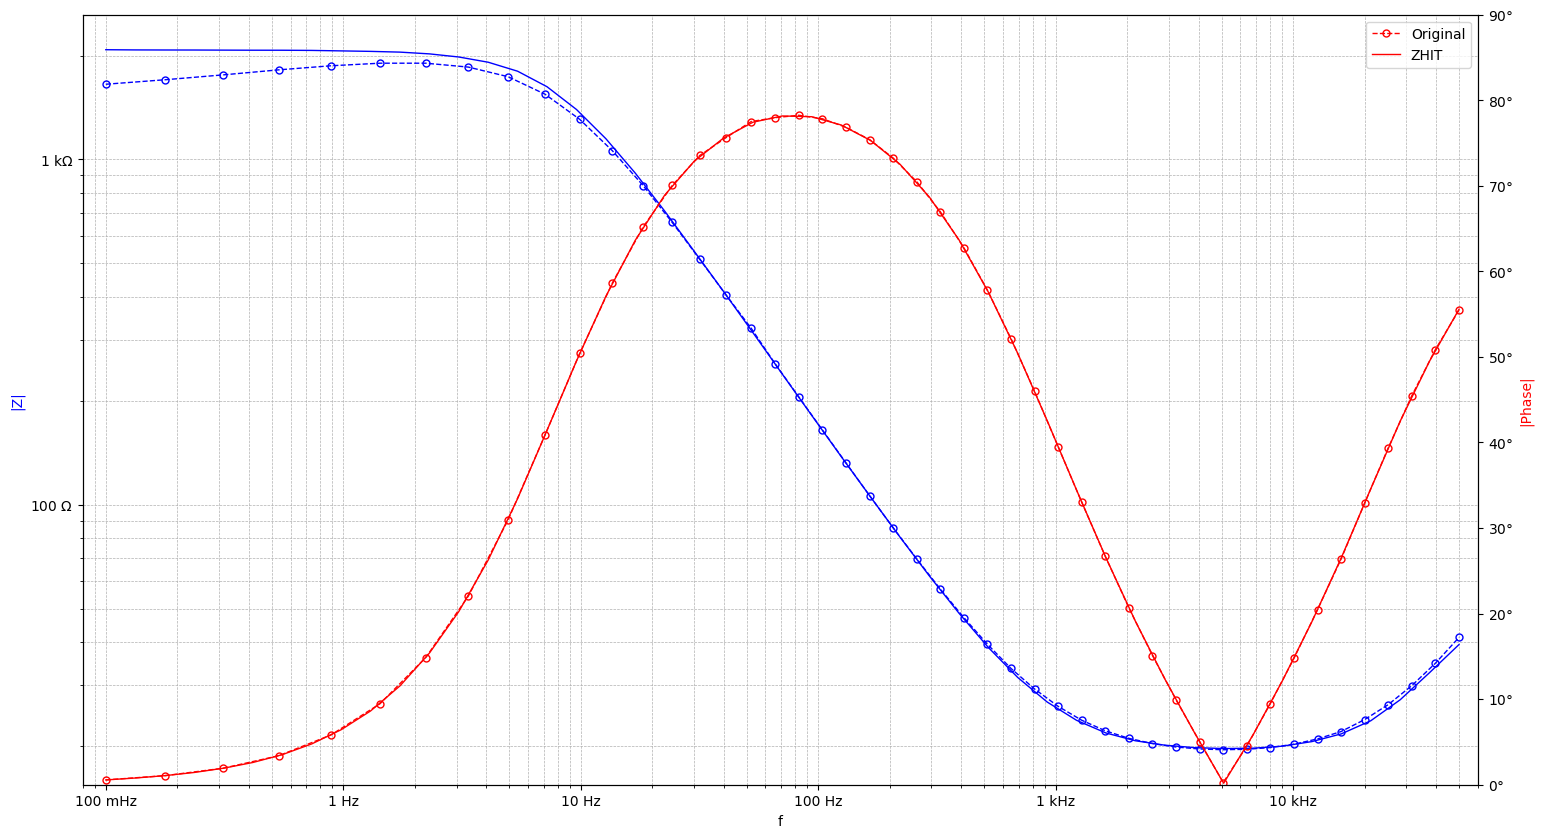

In [21]:
if __name__ == "__main__":
    fitting = EisFitting()

    dataWithDrift = IsmImport("drift.ism")
    dataWithZHIT = fitting.zhit(dataWithDrift)

    (fig1, (impedanceAxis1, phaseAxis1)) = bodePlotter(impedanceObject=dataWithDrift)
    (fig1, (impedanceAxis1, phaseAxis1)) = bodePlotter(
        (impedanceAxis1, phaseAxis1),
        impedanceObject=dataWithZHIT,
        argsImpedanceAxis={"linestyle": "solid", "marker": None},
        argsPhaseAxis={"linestyle": "solid", "marker": None},
    )
    phaseAxis1.legend(["Original", "ZHIT"])
    fig1.set_size_inches(18, 10)


# Fit with ZHIT validated data

## Performing the fit

Alternatively, ZHIT can be selected as the `"DataSource": "zhit"` during the fit, in which case the data is smoothed and the ZHIT is applied to it.

In [22]:

    fitParams = {
        "DataSource": "zhit",
        "Smoothness": 0.0002,
        "NumberOfSamples": 40,
    }

    impedanceCircuitModel = IsfxModelImport("RC-R-L.isfx")
    fittingResult = fitting.fit(
        impedanceCircuitModel, dataWithDrift, fitParams=fitParams
    )
    print(fittingResult)

Fitted Model:
resistor : R0
      R:  1.977e+01 Ω        fixed: False
resistor : R1
      R:  2.081e+03 Ω        fixed: False
inductor : L0
      L:  1.042e-04 H        fixed: False
capacitor : C0
      C:  9.342e-06 F        fixed: False
JSON fit result:
{
  "model": {
    "C0": {
      "C": {
        "error": 1.8924698256870753,
        "significance": 0.9693373236699465,
        "value": 9.342348671171955e-06,
        "value_unit": "F"
      }
    },
    "L0": {
      "L": {
        "error": 7.432796269686561,
        "significance": 0.8617944233752491,
        "value": 0.00010424515935997804,
        "value_unit": "H"
      }
    },
    "R0": {
      "R": {
        "error": 0.7162300595488981,
        "significance": 0.9993767890884853,
        "value": 19.770584976337787,
        "value_unit": "Ω"
      }
    },
    "R1": {
      "R": {
        "error": 1.0716888577898374,
        "significance": 0.9902086551825948,
        "value": 2080.765985735017,
        "value_unit": "Ω"
   

## Read ZHIT data from the Fit result

The [method getFitInputData](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.getFitInputData) can then be used to read the data to which the ZHIT was applied from the object.

The returned [IsmImport](https://doc.zahner.de/zahner_analysis/file_import/index.html#zahner_analysis.file_import.ism_import.IsmImport) can then also be saved under any file name.

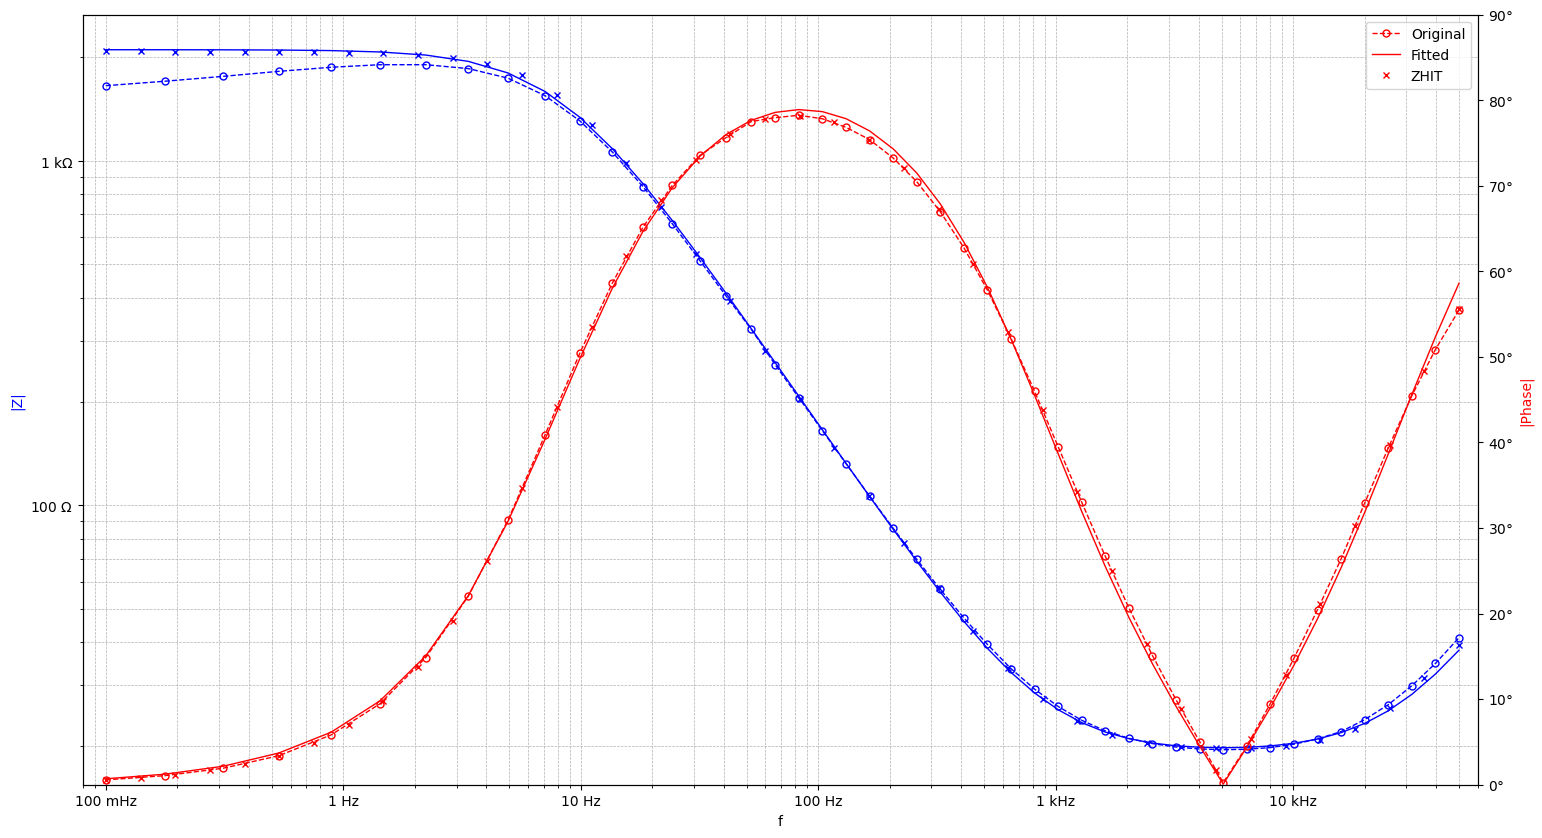

In [23]:
    (fig2, (impedanceAxis2, phaseAxis2)) = bodePlotter(impedanceObject=dataWithDrift)
    (fig2, (impedanceAxis2, phaseAxis2)) = bodePlotter(
        (impedanceAxis2, phaseAxis2),
        impedanceObject=fittingResult.getFittedSimulatedData(),
        argsImpedanceAxis={"linestyle": "solid", "marker": None},
        argsPhaseAxis={"linestyle": "solid", "marker": None},
    )
    (fig2, (impedanceAxis2, phaseAxis2)) = bodePlotter(
        (impedanceAxis2, phaseAxis2),
        impedanceObject=fittingResult.getFitInputData(),
        argsImpedanceAxis={"linestyle": "None", "marker": "x"},
        argsPhaseAxis={"linestyle": "None", "marker": "x"},
    )
    
    phaseAxis2.legend(["Original", "Fitted", "ZHIT"])
    fig2.set_size_inches(18, 10)
    
    fittingResult.getFitInputData().save("ZHIT.ism")
    
    plt.show()